In [1]:
import torch
import cv2
import glob
import numpy as np
import ultralytics
import matplotlib.pyplot as plt
import yolo_utils
from tqdm import tqdm

## Prepare yolo detection result

1. use yolo to detect
2. assign labels : 0-invalid, 1-front, 2-left, 3-right

In [2]:
script_module = torch.jit.load("../models/yolo/yolov8n.torchscript")

In [3]:
save_path = "/home/yeliu/Development/LidarMapping/data/car_data_yolo"
image_paths = glob.glob("/home/yeliu/Development/LidarMapping/data/car_data/*/*.jpg")
image_paths.sort()

In [13]:
def process_image(image_path, save_path):
    image_name = image_path.split('/')[-1].split('.')[0]
    
    image_raw = cv2.imread(image_path)
    image = yolo_utils.load_image(image_raw)
    result = script_module(image)
    preds = ultralytics.utils.ops.non_max_suppression(result)[0]
    
    sub_images = yolo_utils.get_label_blocks(image_raw, preds)
    # save the sub images
    for i in range(len(sub_images)):
        save_image_path = save_path + "/" + image_name + "_" + str(i) + ".jpg"
        cv2.imwrite(save_image_path, sub_images[i])

In [15]:
for i in tqdm(range(len(image_paths))):
    process_image(image_paths[i], save_path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8076/8076 [10:14<00:00, 13.15it/s]


## use opencv GUI to assign label

In [31]:
import shutil
import os
block_images_path = "/home/yeliu/Development/LidarMapping/data/car_data_yolo"
save_mm_path = "/home/yeliu/Development/ace/data/car_det"
os.mkdir(save_mm_path + "/0") 
os.mkdir(save_mm_path + "/1") 
os.mkdir(save_mm_path + "/2") 
os.mkdir(save_mm_path + "/3") 
os.mkdir(save_mm_path + "/4") 


label_images = glob.glob(block_images_path + "/*.jpg")
label_images.sort()

In [84]:
botton_size = 60
botton_height = 50
margin = 10
label_bottons = [
    [0, botton_size, 0, "invalid"],
    [botton_size + margin, 2 * botton_size + margin, 1, "front"],
    [2 * botton_size + 2 * margin, 3 * botton_size + 2 * margin, 2, "left"],
    [3 * botton_size + 3 * margin, 4 * botton_size + 3 * margin, 3, "right"],
    [4 * botton_size + 4 * margin, 5 * botton_size + 4 * margin, 4, "center"]
]

current_idx = -1
    
def draw_image_gui(image_raw):
    # resize image_raw
    image_raw = cv2.resize(image_raw, (480, 480))
    
    shape_raw = image_raw.shape
    image_draw = np.zeros((shape_raw[0] + botton_height + 30, shape_raw[1], shape_raw[2]), np.uint8)
    image_draw[botton_height + 30:, :, :] = image_raw
    
    for i in range(len(label_bottons)):
        botton = label_bottons[i]
        cv2.rectangle(image_draw,(botton[0],0),(botton[1],botton_height),(0,255,0),-1)
        cv2.putText(image_draw, botton[3],
                    (botton[0], int(botton_height * 0.5)), cv2.FONT_HERSHEY_SIMPLEX ,
                    0.7, (255, 0, 255), 2, cv2.LINE_AA)
            
    cv2.rectangle(image_draw,(400,0),(480,botton_height),(0,0,255),-1)
    
    cv2.putText(image_draw, str(current_idx)+"/"+str(len(label_images)),
                (0, botton_height + 20), cv2.FONT_HERSHEY_SIMPLEX ,
                0.5, (200, 200, 0), 2, cv2.LINE_AA)
    
    return image_draw


def update_image(current_idx):
    current_idx = current_idx + 1
    image_raw = cv2.imread(label_images[current_idx])
    image_gui = draw_image_gui(image_raw)
    return image_gui, current_idx

current_idx = 3600
image_gui, current_idx = update_image(current_idx)

# mouse callback function
def save_image(event,x,y,flags,param):
    global image_gui, current_idx
    if event != cv2.EVENT_LBUTTONDOWN:
        return
    if y > botton_height:
        return
    for i in range(len(label_bottons)):
        botton = label_bottons[i]
        if x > botton[0] and x < botton[1]:
            cv2.rectangle(image_gui,(botton[0],0),(botton[1],botton_height),(0,100,0),-1)
            # save the image
            image_name = label_images[current_idx].split('/')[-1].split('.')[0]
            save_file = save_mm_path + "/" + str(botton[2]) + "/" + image_name + ".jpg"
            shutil.copyfile(label_images[current_idx], save_file)
            # next image
            image_gui, current_idx = update_image(current_idx)
            
    if x > 400 and x < 480:
        # next image
        image_gui, current_idx = update_image(current_idx)
        
    
        
cv2.namedWindow('yolo_blocks')
cv2.setMouseCallback('yolo_blocks', save_image)

while(1):
    cv2.imshow('yolo_blocks', image_gui)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread (0x8a6c9e0).
Cannot move to target thread (0x848a640)

QObject::moveToThread: Current thread (0x848a640) is not the object's thread

## data augmentation

In [100]:
left_image_paths = glob.glob("/home/yeliu/Development/ace/data/car_det/2/*.jpg")
right_image_paths = glob.glob("/home/yeliu/Development/ace/data/car_det/3/*.jpg")

In [98]:
# data agumentation left <-> right
for left_path in left_image_paths:
    name = left_path.split('/')[-1]
    image = cv2.imread(left_path)
    image = cv2.flip(image, 1) 
    cv2.imwrite("/home/yeliu/Development/ace/data/car_det/3/" + name, image)

for right_path in right_image_paths:
    name = right_path.split('/')[-1]
    image = cv2.imread(right_path)
    image = cv2.flip(image, 1) 
    cv2.imwrite("/home/yeliu/Development/ace/data/car_det/2/" + name, image)

# Classification Model

In [117]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CarLocClassNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(13456, 1024)
        self.fc2 = nn.Linear(1024, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x


In [102]:
import random
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
import torchvision.transforms as transforms

In [104]:
transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     transforms.Resize((128, 128))])

dataset = ImageFolder("/home/yeliu/Development/ace/data/car_det", transform) # adding transform to the dataset

# splitting training and testing sets
batch_size = 32
indices = list(range(len(dataset)))
random.shuffle(indices)
split_point = int(0.85*len(indices))
train_indices = indices[:split_point]
test_indices = indices[split_point:]
print("Size of the training set:", len(train_indices))
print("Size of the  testing set:", len(test_indices))

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(train_indices))
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(test_indices))

Size of the training set: 3296
Size of the  testing set: 582


In [118]:
model_class = CarLocClassNet().to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_class.parameters(), lr=0.001, momentum=0.9)

best_test = 1e6
running_losses = []
test_losses = []

[    1] train loss: 1.574, test loss: 1.502
[    2] train loss: 1.367, test loss: 1.144
[    3] train loss: 0.968, test loss: 0.877
[    4] train loss: 0.776, test loss: 0.688
[    5] train loss: 0.667, test loss: 0.628
[    6] train loss: 0.589, test loss: 0.556
[    7] train loss: 0.511, test loss: 0.546
[    8] train loss: 0.467, test loss: 0.509
[    9] train loss: 0.417, test loss: 0.478
[   10] train loss: 0.399, test loss: 0.566
[   11] train loss: 0.352, test loss: 0.421
[   12] train loss: 0.317, test loss: 0.474
[   13] train loss: 0.290, test loss: 0.446
[   14] train loss: 0.262, test loss: 0.453
[   15] train loss: 0.247, test loss: 0.571
[   16] train loss: 0.229, test loss: 0.462
[   17] train loss: 0.214, test loss: 0.386
[   18] train loss: 0.214, test loss: 0.392
[   19] train loss: 0.178, test loss: 0.382
[   20] train loss: 0.155, test loss: 0.432
[   21] train loss: 0.139, test loss: 0.430
[   22] train loss: 0.141, test loss: 0.483
[   23] train loss: 0.135, test 

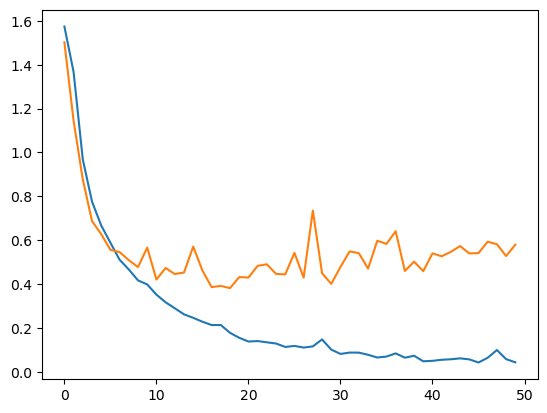

In [119]:
num_epoches = 50
for epoch in range(num_epoches):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_class(inputs.to('cuda'))
        loss = criterion(outputs, labels.to('cuda'))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    
    test_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            inputs, labels = data
            outputs = model_class(inputs.to('cuda'))
            test_loss += criterion(outputs, labels.to('cuda')).item()
            
    running_loss /= len(train_loader)
    test_loss /= len(test_loader)
    running_losses.append(running_loss)
    test_losses.append(test_loss)
    print(f'[{epoch + 1 : 5d}] train loss: {running_loss:.3f}, test loss: {test_loss:.3f}')
    
    if test_loss < best_test:
        best_test = test_loss
        torch.save(model_class.state_dict(), "../models/model_class.pt")

torch.save(model_class.state_dict(), "../models/model_class_final.pt")
print('Finished Training')

plt.figure()
plt.plot(running_losses)
plt.plot(test_losses)
plt.show()

In [124]:
idx = 0

tensor([[16.8796,  0.0000,  0.0000,  0.0000,  3.0570]], device='cuda:0', grad_fn=<ReluBackward0>)
invalid


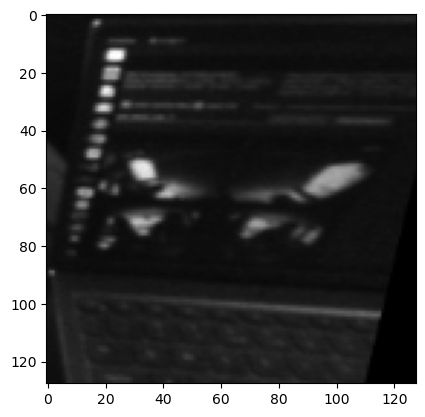

In [180]:
idx += 1
inputs = dataset[test_indices[idx]][0].unsqueeze(0)
outputs = model_class(inputs.to('cuda'))
label_id = torch.argmax(outputs)

plt.imshow(inputs[0, 0].numpy(),cmap='gray')
print(outputs)
if outputs[0, label_id] > 10 :
    print(label_bottons[label_id][3])
else:
    print("invalid")